In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states

# Census API Key
from config import gkey, yelp_key, census_key
c = Census(census_key, year=2013)

In [2]:
farm_markets = pd.read_csv("CleanFM.csv")

farm_markets.columns

Index(['Unnamed: 0', 'MarketName', 'city', 'County', 'State', 'zip',
       'Season1Date', 'Season1Time', 'Season2Date', 'Season2Time',
       'Season3Date', 'Season3Time', 'Season4Date', 'Season4Time', 'Longitude',
       'Latitude', 'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Organic',
       'Bakedgoods', 'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood', 'Herbs',
       'Vegetables', 'Honey', 'Jams', 'Maple', 'Meat', 'Nursery', 'Nuts',
       'Plants', 'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine', 'Coffee',
       'Beans', 'Fruits', 'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu',
       'WildHarvested', 'updateTime', 'Region'],
      dtype='object')

In [3]:

farm_markets_visual = farm_markets.copy()
farm_markets_visual.head()

,Unnamed: 0,MarketName,city,County,State,zip,Season1Date,Season1Time,Season2Date,Season2Time,...,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime,Region
0,0,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,5828,06/14/2017 to 08/30/2017,Wed: 9:00 AM-1:00 PM;,09/06/2017 to 10/18/2017,Wed: 2:00 PM-6:00 PM;,...,Y,Y,N,N,Y,Y,N,N,6/20/2017 10:43:57 PM,Northeast
1,1,Barre Farmers Market,Barre,Washington,Vermont,5641,05/31/2017 to 10/04/2017,Wed: 4:00 PM-7:30 PM;,NaN,NaN,...,N,Y,N,N,N,N,N,N,7/4/2017 10:33:01 AM,Northeast
2,2,Bethel Farmers Market,Bethel,Windsor,Vermont,5089,NaN,NaN,NaN,NaN,...,N,N,N,N,N,N,N,N,2009,Northeast
3,3,Bradford Farmers Market,Bradford,Orange,Vermont,5033,05/18/2014 to 10/19/2014,Sun: 10:00 AM-2:00 PM;,NaN,NaN,...,N,Y,N,N,N,N,N,N,4/9/2014 10:03:26 AM,Northeast
4,4,Brandon Farmers Market,Brandon,Rutland,Vermont,5733,05/22/2015 to 10/09/2015,Fri: 9:00 AM-2:00 PM;,NaN,NaN,...,N,Y,N,N,N,N,N,N,4/23/2015 3:34:19 PM,Northeast


In [5]:
farm_markets_visual["Organic"].nunique()

3

In [6]:
farm_markets_visual["Organic"].value_counts()

-    5012
Y    2372
N    1317
Name: Organic, dtype: int64

In [7]:
bins = [0, 60000, 150000, 500000]

# Create the names for the four bins
group_names = ["Low Income", "Medium Income", "High Income"]

farm_markets_visual["Income Group"] = pd.cut(farm_markets_visual["Household Income"], bins, labels=group_names)
farm_markets_visual 

#market_by_income = farm_markets_visual.groupby["Income Group"]["Organic"].count()

In [17]:
income_byzip = updated_farm_markets.groupby(["zip"])["Household Income"].mean().reset_index(name="income")
income_byzip = income_byzip.set_index("zip")
income_byzip1= income_byzip["income"]

In [18]:
income_byzip.head(5)

,income
zip,
0,NaN
10002,33218.0
10003,92540.0
10004,129313.0
10007,216037.0


In [19]:
marketcount_byzip=updated_farm_markets.groupby(["zip"])["MarketName"].count().reset_index(name="market_count")
marketcount_byzip = marketcount_byzip.set_index("zip")
marketcount1=marketcount_byzip["market_count"]

In [20]:
marketcount_byzip.head(5)

,market_count
zip,
0,1
10002,1
10003,2
10004,2
10007,3


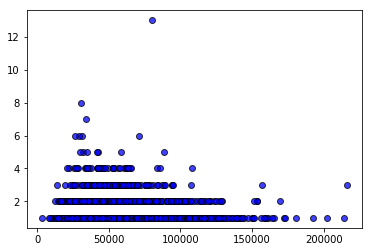

In [21]:
plt.scatter(income_byzip1, marketcount1, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75,label="MarketbyIncome")

In [22]:
#income_byzip = updated_farm_markets.groupby(["zip"])["Household Income"].mean().reset_index(name="income")
#income_byzip = income_byzip.set_index("zip")
#income_byzip1= income_byzip["income"]

population_byzip=updated_farm_markets.groupby(["zip"])["Population"].sum()
population_byzip_df= pd.DataFrame(population_byzip)
#population_byzip_df

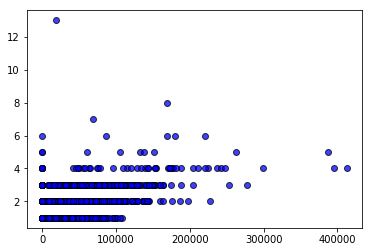

In [23]:
plt.scatter(population_byzip, marketcount1, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75,label="MarketbyPopulation")

In [24]:
#updated_farm_markets

In [25]:
bins = [0, 60000, 150000, 500000]

# Create the names for the four bins
group_names = ["Low Income", "Medium Income", "High Income"]

In [26]:
updated_farm_markets["Income Group"] = pd.cut(updated_farm_markets["Household Income"], bins, labels=group_names)
updated_farm_markets 

,MarketName,city,County,State,zip,Season1Date,Season1Time,Season2Date,Season2Time,Season3Date,...,Mushrooms,PetFood,Tofu,WildHarvested,Median Age,Population,Poverty Count,Household Income,Per Capita Income,Income Group
0,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,5828,06/14/2017 to 08/30/2017,Wed: 9:00 AM-1:00 PM;,09/06/2017 to 10/18/2017,Wed: 2:00 PM-6:00 PM;,NaN,...,Y,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN
1,Stearns Homestead Farmers' Market,Parma,Cuyahoga,Ohio,NaN,06/24/2017 to 09/30/2017,Sat: 9:00 AM-1:00 PM;,NaN,NaN,NaN,...,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN
2,106 S. Main Street Farmers Market,Six Mile,NaN,South Carolina,29682,NaN,NaN,NaN,NaN,NaN,...,N,N,N,N,42.5,3965.0,599.0,41686.0,21726.0,Low Income
3,10th Steet Community Farmers Market,Lamar,Barton,Missouri,64759,04/02/2014 to 11/30/2014,Wed: 3:00 PM-6:00 PM;Sat: 8:00 AM-1:00 PM;,NaN,NaN,NaN,...,N,N,N,N,38.0,8778.0,1604.0,45781.0,21039.0,Low Income
4,112st Madison Avenue,New York,New York,New York,10029,July to November,Tue:8:00 am - 5:00 pm;Sat:8:00 am - 8:00 pm;,NaN,NaN,NaN,...,N,N,N,N,33.5,77454.0,21062.0,31888.0,25270.0,Low Income
5,12 South Farmers Market,Nashville,Davidson,Tennessee,37204,05/05/2015 to 10/27/2015,Tue: 3:30 PM-6:30 PM;,NaN,NaN,NaN,...,Y,Y,N,N,33.2,12869.0,874.0,64267.0,40886.0,Medium Income
6,125th Street Fresh Connect Farmers' Market,New York,New York,New York,10027,06/10/2014 to 11/25/2014,Tue: 10:00 AM-7:00 PM;,NaN,NaN,NaN,...,N,N,N,N,30.7,62617.0,16581.0,37872.0,27349.0,Low Income
7,12th & Brandywine Urban Farm Market,Wilmington,New Castle,Delaware,19801,05/16/2014 to 10/17/2014,Fri: 8:00 AM-11:00 AM;,NaN,NaN,NaN,...,N,N,N,N,32.0,15656.0,4843.0,27394.0,18082.0,Low Income
8,14&U Farmers' Market,Washington,District of Columbia,District of Columbia,20009,05/03/2014 to 11/22/2014,Sat: 9:00 AM-1:00 PM;,NaN,NaN,NaN,...,N,N,N,N,32.9,49979.0,5248.0,88684.0,63014.0,Medium Income
9,14th & Kennedy Street Farmers Market,Washington,District of Columbia,District of Columbia,20011,04/09/2016 to 11/19/2016,Sat: 9:00 AM-1:00 PM;,NaN,NaN,NaN,...,N,Y,N,N,36.9,62569.0,9559.0,54488.0,31521.0,Low Income


In [27]:
#updated_farm_markets

In [29]:
market_byincome=updated_farm_markets.groupby(["Income Group"])["MarketName"].count()
market_byincome_df= pd.DataFrame(market_byincome)

In [30]:
market_byincome_df

,MarketName
Income Group,
Low Income,4734
Medium Income,1872
High Income,30


In [35]:
updated_farm_markets["Organic"]
farm_markets_visual = updated_farm_markets.copy()


In [36]:
farm_markets_visual["Organic"].nunique()

3

In [37]:
farm_markets_visual["Organic"] = farm_markets_visual["Organic"].replace(r'-', 'N', regex=True)

In [38]:
farm_markets_visual["Organic"].nunique()

2

,MarketName,city,County,State,zip,Season1Date,Season1Time,Season2Date,Season2Time,Season3Date,...,Mushrooms,PetFood,Tofu,WildHarvested,Median Age,Population,Poverty Count,Household Income,Per Capita Income,Income Group
0,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,5828,06/14/2017 to 08/30/2017,Wed: 9:00 AM-1:00 PM;,09/06/2017 to 10/18/2017,Wed: 2:00 PM-6:00 PM;,NaN,...,Y,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN
1,Stearns Homestead Farmers' Market,Parma,Cuyahoga,Ohio,NaN,06/24/2017 to 09/30/2017,Sat: 9:00 AM-1:00 PM;,NaN,NaN,NaN,...,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN
2,106 S. Main Street Farmers Market,Six Mile,NaN,South Carolina,29682,NaN,NaN,NaN,NaN,NaN,...,N,N,N,N,42.5,3965.0,599.0,41686.0,21726.0,Low Income
3,10th Steet Community Farmers Market,Lamar,Barton,Missouri,64759,04/02/2014 to 11/30/2014,Wed: 3:00 PM-6:00 PM;Sat: 8:00 AM-1:00 PM;,NaN,NaN,NaN,...,N,N,N,N,38.0,8778.0,1604.0,45781.0,21039.0,Low Income
4,112st Madison Avenue,New York,New York,New York,10029,July to November,Tue:8:00 am - 5:00 pm;Sat:8:00 am - 8:00 pm;,NaN,NaN,NaN,...,N,N,N,N,33.5,77454.0,21062.0,31888.0,25270.0,Low Income
5,12 South Farmers Market,Nashville,Davidson,Tennessee,37204,05/05/2015 to 10/27/2015,Tue: 3:30 PM-6:30 PM;,NaN,NaN,NaN,...,Y,Y,N,N,33.2,12869.0,874.0,64267.0,40886.0,Medium Income
6,125th Street Fresh Connect Farmers' Market,New York,New York,New York,10027,06/10/2014 to 11/25/2014,Tue: 10:00 AM-7:00 PM;,NaN,NaN,NaN,...,N,N,N,N,30.7,62617.0,16581.0,37872.0,27349.0,Low Income
7,12th & Brandywine Urban Farm Market,Wilmington,New Castle,Delaware,19801,05/16/2014 to 10/17/2014,Fri: 8:00 AM-11:00 AM;,NaN,NaN,NaN,...,N,N,N,N,32.0,15656.0,4843.0,27394.0,18082.0,Low Income
8,14&U Farmers' Market,Washington,District of Columbia,District of Columbia,20009,05/03/2014 to 11/22/2014,Sat: 9:00 AM-1:00 PM;,NaN,NaN,NaN,...,N,N,N,N,32.9,49979.0,5248.0,88684.0,63014.0,Medium Income
9,14th & Kennedy Street Farmers Market,Washington,District of Columbia,District of Columbia,20011,04/09/2016 to 11/19/2016,Sat: 9:00 AM-1:00 PM;,NaN,NaN,NaN,...,N,Y,N,N,36.9,62569.0,9559.0,54488.0,31521.0,Low Income


TypeError: 'method' object is not subscriptable

In [52]:
market_byincome=farm_markets_visual.groupby(["Income Group"])["Organic"]
market_byincome_df= pd.DataFrame(market_byincome)

AttributeError: 'SeriesGroupBy' object has no attribute 'value_count'

In [51]:
market_byincome_df

,Organic
Income Group,
Low Income,4734
Medium Income,1872
High Income,30
